In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## Base de dados

A minha base de dados é composta de várias planilhas csv disponibilizadas pelo site do INPI (Instituto Nacional da Propriedade Industrial) e precisarei começando a tratar os dados para remover as informações que não nos auxiliariam a entender uma análise simplificada de quantidades de patentes, países depositantes, data de depósito e tipo de patente. Estes dados compreendem pedidos de patentes entre 1997 a 2021.

# Informações que encontraremos nessa base de dados inicial e algumas orientações quanto aos seus tipos:

- NO_PEDIDO - Informa o número atribuido ao Pedido de Patente depositado 
- DT_ENTRADA_INPI - Informa a data em que esse pedido de patente foi registrado no Brasil
- DT_DEPOSITO - Informa a data de primeiro registro desta invenção. Para casos de origem internacional esta data difere da data de entrada no INPI porque primeiro o pedido foi registrado em seu país de origem e só então foi registrado no Brasil. 
- VIA_ENTRADA - Existem várias formas de entrada de registro no INPI. 
- CD_PAIS_PFPJ - Informa qual o país de origem da invenção. Todas as patentes analisadas foram registradas no Brasil mas muitas não foram inventadas aqui. 
- CD_NATUREZ_PEDIDO - Informa qual o tipo de proteção solicitada para aquele tipo de invenção (PI - Patente de Invenção, MU - Modelo de Utilidade, C - Programa de Computador, ZZ - Não atribuído)

In [2]:
#Importando a base de dados dos depósitos de patentes
df_deposito = pd.read_csv('depositos.csv')
df_deposito

C:\Users\User\AppData\Local\Temp\ipykernel_12452\349850473.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_deposito = pd.read_csv('depositos.csv')


,NO_PEDIDO,DT_ENTRADA_INPI,DT_DEPOSITO,CD_PAIS_PFPJ,VIA_ENTRADA,CD_NATUREZ_PEDIDO
0,PCT/EP2006/0,28/12/2017 10:48:02,NaN,DE,0,ZZ
1,PI0611443,29/12/2017 10:11:44,15/05/2006 00:00:00,DE,0,PI
2,PI0611447,29/12/2017 09:59:03,08/05/2006 00:00:00,IT,0,PI
3,PI0703280,08/03/2018 15:39:15,04/10/2007 00:00:00,BR,0,PI
4,PI0925411,30/09/2013 00:00:00,15/09/2009 00:00:00,CH,0,PI
...,...,...,...,...,...,...
638364,202012027826,30/10/2012 00:00:00,30/10/2012 00:00:00,BR,0,MU
638365,202012027832,30/10/2012 00:00:00,30/10/2012 00:00:00,BR,0,MU
638366,202012027844,30/10/2012 00:00:00,30/10/2012 00:00:00,BR,0,MU
638367,202012027866,30/10/2012 00:00:00,30/10/2012 00:00:00,BR,0,MU


### Muitas das colunas presentes na base de dados inicial não serão necessárias e úteis para a nossa análise simplificada, então realizei o tratamento dos dados para melhor aproveitamento das informações. As informações de "via de entrada" e "data de depósito" não são relevantes para a nossa análise e serão removidas.

In [3]:
# Tratando os dados, removendo colunas que não serão necessárias para a nossa a análise:
df_deposito = df_deposito.drop('DT_DEPOSITO', axis=1)
df_deposito = df_deposito.drop('VIA_ENTRADA', axis=1)
print(df_deposito)

           NO_PEDIDO      DT_ENTRADA_INPI CD_PAIS_PFPJ CD_NATUREZ_PEDIDO
0       PCT/EP2006/0  28/12/2017 10:48:02           DE                ZZ
1          PI0611443  29/12/2017 10:11:44           DE                PI
2          PI0611447  29/12/2017 09:59:03           IT                PI
3          PI0703280  08/03/2018 15:39:15           BR                PI
4          PI0925411  30/09/2013 00:00:00           CH                PI
...              ...                  ...          ...               ...
638364  202012027826  30/10/2012 00:00:00           BR                MU
638365  202012027832  30/10/2012 00:00:00           BR                MU
638366  202012027844  30/10/2012 00:00:00           BR                MU
638367  202012027866  30/10/2012 00:00:00           BR                MU
638368  202012027870  30/10/2012 00:00:00           BR                MU

[638369 rows x 4 columns]


### Os nomes escolhidos pelo INPI para nomear as colunas presentes na base de dados inicial são desnecessariamente longos e confusos. Por isso, decidi alterá-los também para facilitar nossa compreensão.

In [4]:
# Tratando os dados renomeando as colunas para facilitar o nosso entendimento:
df_deposito.rename(columns={'CD_PAIS_PFPJ': 'PAÍS'}, inplace=True)
df_deposito.rename(columns={'DT_ENTRADA_INPI':'DATA_ENTRADA'}, inplace=True)
df_deposito.rename(columns={'CD_NATUREZ_PEDIDO':'TIPO'}, inplace=True)
print(df_deposito)


           NO_PEDIDO         DATA_ENTRADA PAÍS TIPO
0       PCT/EP2006/0  28/12/2017 10:48:02   DE   ZZ
1          PI0611443  29/12/2017 10:11:44   DE   PI
2          PI0611447  29/12/2017 09:59:03   IT   PI
3          PI0703280  08/03/2018 15:39:15   BR   PI
4          PI0925411  30/09/2013 00:00:00   CH   PI
...              ...                  ...  ...  ...
638364  202012027826  30/10/2012 00:00:00   BR   MU
638365  202012027832  30/10/2012 00:00:00   BR   MU
638366  202012027844  30/10/2012 00:00:00   BR   MU
638367  202012027866  30/10/2012 00:00:00   BR   MU
638368  202012027870  30/10/2012 00:00:00   BR   MU

[638369 rows x 4 columns]


### Agora inicio os passos iniciais da análise, descobrindo informações básicas sobre os dados que estão nas colunas restantes que escolhi para trabalhar.

In [5]:
# Descobrindo os tipos de dados
df_deposito.dtypes

NO_PEDIDO       object
DATA_ENTRADA    object
PAÍS            object
TIPO            object
dtype: object

In [6]:
# Verificar se há valores nulos
df_deposito.count().isnull()

NO_PEDIDO       False
DATA_ENTRADA    False
PAÍS            False
TIPO            False
dtype: bool

### Realizando uma contagem dos países presentes na base de dados do INPI entre os anos de 1997 a 2021 é possível constatar que quase todos os países já registraram algum pedido via INPI. 

In [7]:
contagem_paises = df_deposito['PAÍS'].value_counts(dropna=False)
print(contagem_paises)

PAÍS
BR    183748
US    174501
DE     52625
JP     34647
FR     31269
       ...  
IQ         1
AZ         1
KH         1
LY         1
FO         1
Name: count, Length: 177, dtype: int64


### Considerando a enorme quantidade de países e pedidos depositados, filtrei os Top 10 depositantes no INPI.

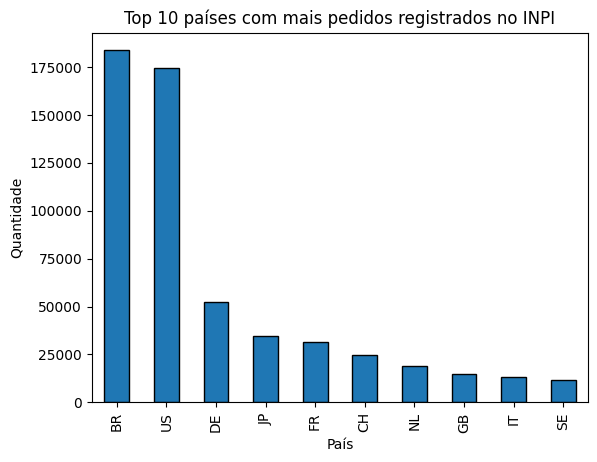

In [8]:
contagem_paises = df_deposito['PAÍS'].value_counts()

top_10_paises = contagem_paises.nlargest(10)

top_10_paises.plot(kind="bar", edgecolor='black')

plt.xlabel("País")
plt.ylabel("Quantidade")
plt.title("Top 10 países com mais pedidos registrados no INPI")

plt.show()

### Após realizar a análise dos top 10 e identificar que os maiores depositantes no INPI atualmente são: Brasil, Estados Unidos, Alemanha e Japão, fiz buscas para avaliar a diferença entre os tipos de proteção solicitadas por cada país. 

PAÍS
BR    183748
Name: count, dtype: int64
TIPO
PI    105587
MU     75807
C       2353
ZZ         1
Name: count, dtype: int64


Text(0.5, 1.0, 'Tipos de Patentes Registradas pelo INPI oriundos do Brasil - 1997 a 2021')

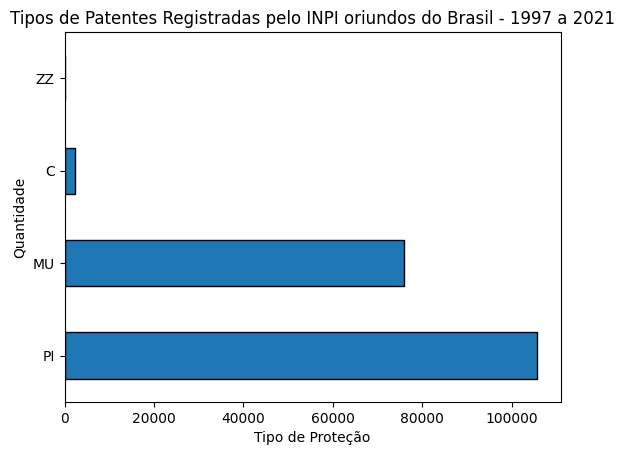

In [9]:
df_filtrado_br = df_deposito[df_deposito['PAÍS'].isin(['BR'])]

total_brasil = df_filtrado_br['PAÍS'].value_counts()
total_brasil = total_brasil
print(total_brasil)

total_pi_brasil = df_filtrado_br['TIPO'].value_counts()
print(total_pi_brasil)

total_pi_brasil.plot(kind="barh", edgecolor='black')

plt.xlabel('Tipo de Proteção')
plt.ylabel('Quantidade')
plt.title('Tipos de Patentes Registradas pelo INPI oriundos do Brasil - 1997 a 2021')


PAÍS
US    174501
Name: count, dtype: int64
TIPO
PI    174110
MU       278
C        113
Name: count, dtype: int64


Text(0.5, 1.0, 'Tipos de Patentes Registradas pelo INPI oriundos dos Estados Unidos - 1997 a 2021')

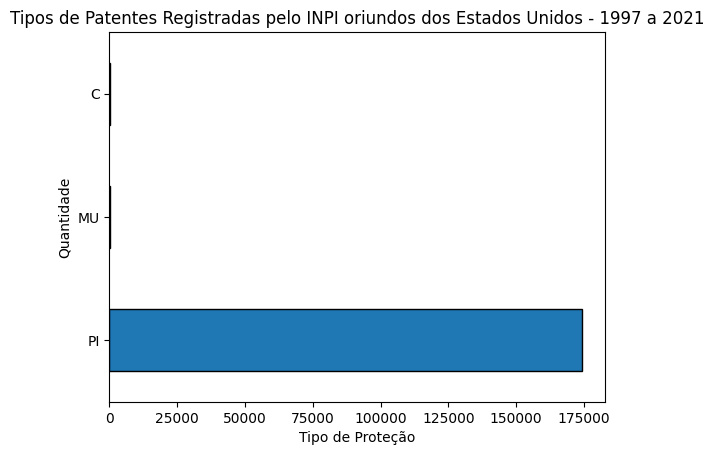

In [10]:
df_filtrado_us = df_deposito[df_deposito['PAÍS'].isin(['US'])]

total_us = df_filtrado_us['PAÍS'].value_counts()
total_us = total_us
print(total_us)

total_pi_us = df_filtrado_us['TIPO'].value_counts()
print(total_pi_us)

total_pi_us.plot(kind="barh", edgecolor='black')

plt.xlabel('Tipo de Proteção')
plt.ylabel('Quantidade')
plt.title('Tipos de Patentes Registradas pelo INPI oriundos dos Estados Unidos - 1997 a 2021')


PAÍS
DE    52625
Name: count, dtype: int64
TIPO
PI    52532
MU       85
C         7
ZZ        1
Name: count, dtype: int64


Text(0.5, 1.0, 'Tipos de Patentes Registradas pelo INPI oriundos da Alemanha - 1997 a 2021')

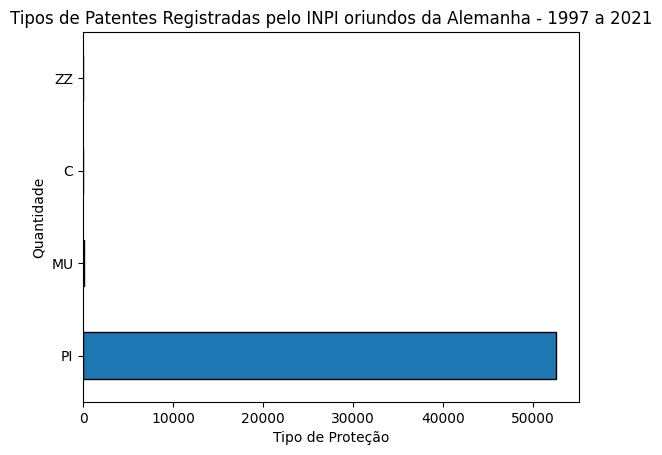

In [11]:
df_filtrado_de = df_deposito[df_deposito['PAÍS'].isin(['DE'])]

total_de = df_filtrado_de['PAÍS'].value_counts()
total_de = total_de
print(total_de)

total_pi_de = df_filtrado_de['TIPO'].value_counts()
print(total_pi_de)

total_pi_de.plot(kind="barh", edgecolor='black')

plt.xlabel('Tipo de Proteção')
plt.ylabel('Quantidade')
plt.title('Tipos de Patentes Registradas pelo INPI oriundos da Alemanha - 1997 a 2021')

PAÍS
JP    34647
Name: count, dtype: int64
TIPO
PI    34601
MU       39
C         7
Name: count, dtype: int64


Text(0.5, 1.0, 'Tipos de Patentes Registradas pelo INPI oriundos do Japão - 1997 a 2021')

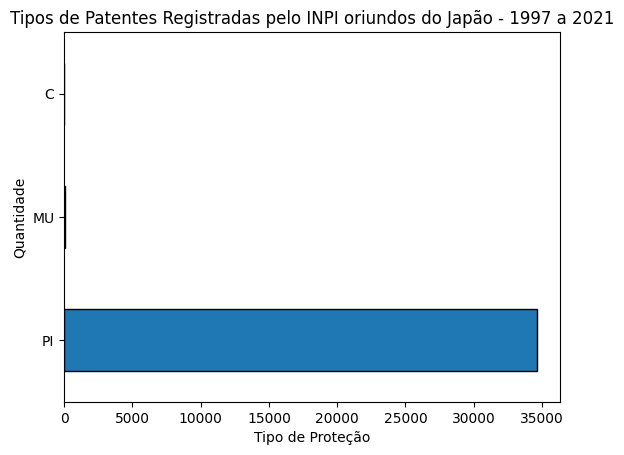

In [12]:
df_filtrado_jp = df_deposito[df_deposito['PAÍS'].isin(['JP'])]

total_jp = df_filtrado_jp['PAÍS'].value_counts()
total_jp = total_jp
print(total_jp)

total_pi_jp = df_filtrado_jp['TIPO'].value_counts()
print(total_pi_jp)

total_pi_jp.plot(kind="barh", edgecolor='black')

plt.xlabel('Tipo de Proteção')
plt.ylabel('Quantidade')
plt.title('Tipos de Patentes Registradas pelo INPI oriundos do Japão - 1997 a 2021')

# Após analisar as diferenças entre os tipos de proteção requeridas por cada um dos 4 maiores depositantes de patentes no INPI, é possível observar que o Brasil é o país que mais deposita pedidos de Patentes para Modelos de Utilidade, enquanto os outros países depositam mais pedidos para Patentes de Invenção.

#### O registro de patente de invenção e o registro de modelo de utilidade são formas de proteção que diferem em termos de requisitos e escopo. 
#### A patente de invenção protege invenções totalmente novas, oferecendo uma proteção mais abrangente, exigindo inventividade, novidade e aplicação industrial. Por outro lado, o registro de modelo de utilidade protege melhorias incrementais em objetos já existentes, requerendo apenas novidade e aplicação industrial. 

## Cabe então a reflexão de nos perguntarmos por quê temos tantas invenções sendo registradas aqui oriundas de outros países enquanto uma grande parte das nossas próprias criações são aprimoramentos em invenções pré-existentes. Por que será que estamos entre os que mais aprimoram e não entre os que mais inventam?

In [13]:
print(total_brasil)
print(total_de)
print(total_us)
print(total_jp)

PAÍS
BR    183748
Name: count, dtype: int64
PAÍS
DE    52625
Name: count, dtype: int64
PAÍS
US    174501
Name: count, dtype: int64
PAÍS
JP    34647
Name: count, dtype: int64


## Para concluir a análise realizada no Jupyter Notebook, criei um gráfico comparativo dos 4 maiores depositantes no INPI e a diferença entre seus números totais de registros.

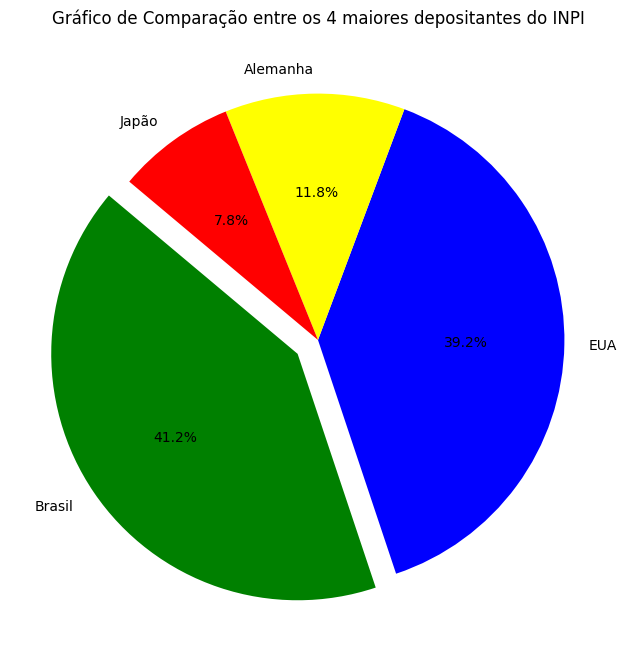

In [14]:
# Criando um gráfico pizza com os totais dos 4 maiores depositantes no país

dados_brasil = 183748
dados_us = 174501
dados_de = 52625
dados_jp = 34647

labels = ['Brasil', 'EUA', 'Alemanha', 'Japão']
sizes = [dados_brasil, dados_us, dados_de, dados_jp]

colors = ['green', 'blue', 'yellow', 'red']

explode = (0.1, 0, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gráfico de Comparação entre os 4 maiores depositantes do INPI')
plt.show()